In [1]:
import cv2
import sys
import matplotlib.pyplot as plt

mask


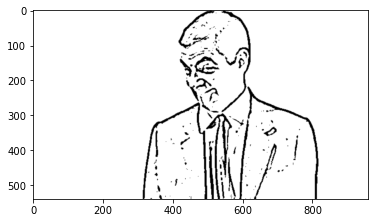

In [2]:
def cartonify(image_path):
    org_image = cv2.imread(image_path)

#Check whether the image is present
    if org_image is None:
        print("NO image found")
        sys.exit()
    resized_1 = cv2.resize(org_image,(960,540))
    #plt.figure()
    #plt.imshow(resized_1)

    gray_image = cv2.cvtColor(org_image,cv2.COLOR_BGR2GRAY)
    resized_2 = cv2.resize(gray_image, (960,540))
    #plt.figure()
    #plt.imshow(resized_2)

#smoothening the image
    smooth_image = cv2.medianBlur(gray_image, 5)
    resized_3 = cv2.resize(smooth_image,(960,540))
    #plt.figure()
    #plt.imshow(resized_3)

#edges by Thresholding technique
    edged_image = cv2.adaptiveThreshold(smooth_image,100, 
        cv2.ADAPTIVE_THRESH_MEAN_C, 
        cv2.THRESH_BINARY,9,9)
    resized_4 = cv2.resize(edged_image,(960,540))
    #plt.figure()
    #plt.imshow(resized_4,cmap='gray')

#adding filter
    color_image = cv2.bilateralFilter(org_image,9, 300, 300)
    resized_5 = cv2.resize(color_image,(960,540))
    #plt.figure()
    #plt.imshow(resized_5)

#overlapping the mask on the image
    cartoon_image = cv2.bitwise_and(color_image, color_image,mask=edged_image)
    resized_6 = cv2.resize(cartoon_image,(500,400))
    cv2.imshow('filteredImage',resized_6)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



file_path = 'mr_bean.jpeg'
cartonify(file_path)